# Texas Licenses

I originally got this dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd 
!ls

col_names = ['LICTYPE',
'LICNUMBER',
'BIZCOUNTY',
'BIZNAME',
'BIZLINE1',
'BIZLINE2',
'BIZCITYSTATE',
'BIZTELEPHONE',
'EXPIRATION',
'OWNER',
'MAILLINE1',
'MAILLINE2',
'MAILCITYSTATE',
'MAILCOUNTYCODE',
'MAILCOUNTY',
'MAILZIP',
'TELEPHONE',
'LICSUBTYPE',
'CEFLAG',]
df = pd.read_csv('licfile.csv', names = col_names)

Licenses.ipynb licfile.csv    violations.csv


/Users/harrisonconnery/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597811,Water Well Driller/Pump Installer,59930,TOM GREEN,"ABEL, JUSTIN C",NaN,NaN,NaN,NaN,1232018,"ABEL, JUSTIN C",6601 RM HIGHWAY 853,NaN,SAN ANGELO TX 76901-9716,451.0,TOM GREEN,76901,3.2595e+09,KP,N
597812,Water Well Driller/Pump Installer,59931,RUNNELS,"GRAY, MATTHEW BRYAN",NaN,NaN,NaN,NaN,1232018,"GRAY, MATTHEW BRYAN",401 VICTOR ST,NaN,ROWENA TX 76875-2608,399.0,RUNNELS,76875,3.25442e+09,KLPW,N
597813,Water Well Driller/Pump Installer,59934,LAVACA,"MAYER, DAVID W",NaN,NaN,NaN,NaN,1272018,"MAYER, DAVID W",966 FM 318 E,NaN,YOAKUM TX 77995-6786,285.0,LAVACA,77995,3.61293e+09,P,N
597814,Water Well Driller/Pump Installer,59936,HOCKLEY,"FRIESEN, FRANCISCO FEHR",NaN,NaN,NaN,NaN,2132018,"FRIESEN, FRANCISCO FEHR",3686 JAMAICA RD,NaN,LEVELLAND TX 79336-9124,219.0,HOCKLEY,79336,8.06598e+09,W,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [3]:
col_names = ['LICTYPE',
'LICNUMBER',
'BIZCOUNTY',
'BIZNAME',
'BIZLINE1',
'BIZLINE2',
'BIZCITYSTATE',
'BIZTELEPHONE',
'EXPIRATION',
'OWNER',
'MAILLINE1',
'MAILLINE2',
'MAILCITYSTATE',
'MAILCOUNTYCODE',
'MAILCOUNTY',
'MAILZIP',
'TELEPHONE',
'LICSUBTYPE',
'CEFLAG',]
df = pd.read_csv('licfile.csv', names = col_names, dtype={'EXPIRATION': str, 'LICNUMBER': str, 
                                                          'MAILCOUNTYCODE': str,'MAILZIP':str, 'TELEPHONE': str})

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [4]:
df.head(5)

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,08102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,09262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,02252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

You can use list slicing with `.str` (we did `dt.per_name.str[:4]` for the home data stuff once), `pd.to_datetime`, or a hundred other methods.

In [5]:
df.head(5)
df.EXPIRATION = pd.to_datetime(df.EXPIRATION, format = '%m%d%Y', errors = 'coerce')

Check the first five expirations to make sure they look right.

In [6]:
df.head(5)

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [7]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [8]:
df.LICTYPE.value_counts().tail(10)

Registered Accessibility Specialist CE Provider    8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Weaving Shop                           4
Barber Hair Braiding Shop                          4
Booting CE Provider                                3
Cosmetology Wig Instructor                         2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Mobile Cosmetology Manicure Specialty Saloon       2
Licensed Court Interpreter CE Provider             2
Legal Service Contract Admin                       1
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [9]:
# Yes I know I left this in here, it's a learning experience!
#df[df['LICTYPE'].str.contains("Electrician")]



## 8. How many of the rows of LICTYPE are NaN?

In [10]:
df['LICTYPE'].isna().value_counts()

False    590730
True       7086
Name: LICTYPE, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [11]:

df['LICTYPE'].str.contains("Electrician").sort_values()

0         False
353307    False
353306    False
353305    False
353304    False
          ...  
492761      NaN
492762      NaN
492763      NaN
492764      NaN
492765      NaN
Name: LICTYPE, Length: 597816, dtype: object

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [12]:
df['LICTYPE'].str.contains("Electrician").fillna(False).value_counts()

False    425978
True     171838
Name: LICTYPE, dtype: int64

## 10. What's the most popular kind of electrician?

In [13]:
df_electrician = df[df['LICTYPE'].str.contains("Electrician").fillna(False)]
df_electrician.LICTYPE.value_counts()

Apprentice Electrician                110593
Journeyman Electrician                 38170
Master Electrician                     16810
Apprentice Sign Electrician             3994
Maintenance Electrician                 1184
Master Sign Electrician                  542
Journeyman Sign Electrician              391
Electrician CE Provider                  109
Electrician Apprenticeship Program        45
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

<AxesSubplot:>

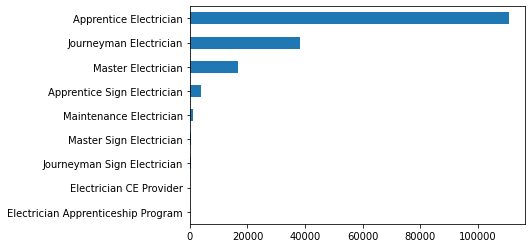

In [14]:
df_electrician.LICTYPE.value_counts(ascending = True).plot(kind = 'barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [15]:
df_electrician.LICTYPE.str.contains('Sign').value_counts()

False    166911
True       4927
Name: LICTYPE, dtype: int64

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [16]:
df['last_name']= df['OWNER'].str.split(',').str[0].fillna('')

In [17]:
df

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,last_name
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597811,Water Well Driller/Pump Installer,59930,TOM GREEN,"ABEL, JUSTIN C",NaN,NaN,NaN,NaN,2018-01-23,"ABEL, JUSTIN C",6601 RM HIGHWAY 853,NaN,SAN ANGELO TX 76901-9716,0451,TOM GREEN,76901,3259496607,KP,N,ABEL
597812,Water Well Driller/Pump Installer,59931,RUNNELS,"GRAY, MATTHEW BRYAN",NaN,NaN,NaN,NaN,2018-01-23,"GRAY, MATTHEW BRYAN",401 VICTOR ST,NaN,ROWENA TX 76875-2608,0399,RUNNELS,76875,3254422331,KLPW,N,GRAY
597813,Water Well Driller/Pump Installer,59934,LAVACA,"MAYER, DAVID W",NaN,NaN,NaN,NaN,2018-01-27,"MAYER, DAVID W",966 FM 318 E,NaN,YOAKUM TX 77995-6786,0285,LAVACA,77995,3612933168,P,N,MAYER
597814,Water Well Driller/Pump Installer,59936,HOCKLEY,"FRIESEN, FRANCISCO FEHR",NaN,NaN,NaN,NaN,2018-02-13,"FRIESEN, FRANCISCO FEHR",3686 JAMAICA RD,NaN,LEVELLAND TX 79336-9124,0219,HOCKLEY,79336,8065980508,W,N,FRIESEN


## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [18]:
df.dtypes

LICTYPE                   object
LICNUMBER                 object
BIZCOUNTY                 object
BIZNAME                   object
BIZLINE1                 float64
BIZLINE2                 float64
BIZCITYSTATE             float64
BIZTELEPHONE             float64
EXPIRATION        datetime64[ns]
OWNER                     object
MAILLINE1                 object
MAILLINE2                 object
MAILCITYSTATE             object
MAILCOUNTYCODE            object
MAILCOUNTY                object
MAILZIP                   object
TELEPHONE                 object
LICSUBTYPE                object
CEFLAG                    object
last_name                 object
dtype: object

# 15. What are the ten most popular last names?

In [19]:
df.last_name.value_counts().head(10)

NGUYEN       22286
TRAN          8137
LE            5606
GARCIA        5574
MARTINEZ      4701
RODRIGUEZ     4626
HERNANDEZ     4390
PHAM          3997
GONZALEZ      3634
SMITH         3208
Name: last_name, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [20]:
df[df.last_name.str.contains('NGUYEN')].LICTYPE.value_counts().head(10)

Cosmetology Manicurist             12922
Cosmetology Operator                4065
Cosmetology Esthetician             2900
Cosmetologist                       1883
Apprentice Electrician               197
A/C Technician                       172
Journeyman Electrician                55
Cosmetology Operator Instructor       49
Cos Mini Salon                        36
Barber Manicurist                     25
Name: LICTYPE, dtype: int64

In [21]:
df[df.last_name.str.contains('TRAN')].LICTYPE.value_counts().head(10)

Cosmetology Manicurist      4756
Cosmetology Operator        1604
Cosmetology Esthetician     1056
Cosmetologist                727
Apprentice Electrician       199
A/C Technician                93
Cosmetology Beauty Salon      69
Cos Mini Salon                48
A/C Contractor                47
Journeyman Electrician        43
Name: LICTYPE, dtype: int64

In [22]:
df[df.last_name.str.contains('LEE')].LICTYPE.value_counts().head(10)

Cosmetology Operator                346
Apprentice Electrician              150
Journeyman Electrician               76
A/C Contractor                       63
Cos Mini Salon                       56
Cosmetology Manicurist               56
Barber, Class A                      52
A/C Technician                       49
Cosmetology Esthetician              48
Legal Service Contract Sales Rep     48
Name: LICTYPE, dtype: int64

The background of this [is interesting](https://www.npr.org/2019/05/19/724452398/how-vietnamese-americans-took-over-the-nails-business-a-documentary) and [tragic](https://www.nytimes.com/2015/05/10/nyregion/at-nail-salons-in-nyc-manicurists-are-underpaid-and-unprotected.html).

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [23]:
df[df.last_name.isin(['NGUYEN', 'TRAN', "LE"])].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending = False).head(10)





LICTYPE                          LICTYPE                        
Cosmetology Manicurist           Cosmetology Manicurist             20808
Cosmetology Operator             Cosmetology Operator                6467
Cosmetology Esthetician          Cosmetology Esthetician             4643
Cosmetologist                    Cosmetologist                       3085
Apprentice Electrician           Apprentice Electrician               327
A/C Technician                   A/C Technician                       281
Journeyman Electrician           Journeyman Electrician                91
Cosmetology Operator Instructor  Cosmetology Operator Instructor       70
Barber Manicurist                Barber Manicurist                     37
Barber, Class A                  Barber, Class A                       36
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ko`

The answer is not `.str.contains('ko')`, but it isn't necessarily too different.

* One way involves a `.str.` method that check if a string ends with something,
* the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before)

If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [24]:
df[df.last_name.str.endswith('KO')].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending = False).head(10)


LICTYPE                           LICTYPE                         
Cosmetology Operator              Cosmetology Operator                67
Apprentice Electrician            Apprentice Electrician              23
Journeyman Electrician            Journeyman Electrician              16
A/C Technician                    A/C Technician                      11
Legal Service Contract Sales Rep  Legal Service Contract Sales Rep    11
Cosmetology Esthetician           Cosmetology Esthetician              9
Master Electrician                Master Electrician                   7
Cosmetology Hair Braider          Cosmetology Hair Braider             7
Cos Mini Salon                    Cos Mini Salon                       5
Cosmetology Manicurist            Cosmetology Manicurist               4
Name: LICTYPE, dtype: int64

## 20. Get that as a percentage

In [25]:
df[df.last_name.str.endswith('KO')].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending = False).head(10)/100


LICTYPE                           LICTYPE                         
Cosmetology Operator              Cosmetology Operator                0.67
Apprentice Electrician            Apprentice Electrician              0.23
Journeyman Electrician            Journeyman Electrician              0.16
A/C Technician                    A/C Technician                      0.11
Legal Service Contract Sales Rep  Legal Service Contract Sales Rep    0.11
Cosmetology Esthetician           Cosmetology Esthetician             0.09
Master Electrician                Master Electrician                  0.07
Cosmetology Hair Braider          Cosmetology Hair Braider            0.07
Cos Mini Salon                    Cos Mini Salon                      0.05
Cosmetology Manicurist            Cosmetology Manicurist              0.04
Name: LICTYPE, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [26]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [27]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [28]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [29]:
df['OWNER'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [30]:
df['OWNER'].str.extract('\W\s(\w+)', expand =False)

0               JIM
1               JON
2              JUAN
3             JAMES
4              JOHN
            ...    
597811       JUSTIN
597812      MATTHEW
597813        DAVID
597814    FRANCISCO
597815        DAVID
Name: OWNER, Length: 597816, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [31]:
df['first_name'] = df['OWNER'].str.extract('\W\s(\w+)', expand =False).fillna('none')

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [32]:
df.first_name.isna().value_counts()

False    597816
Name: first_name, dtype: int64

What do their names look like?

In [33]:
df[df.first_name.isna()]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,last_name,first_name


## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

How many empty first names do we have now?

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [34]:
df.first_name.value_counts().head(10)

none           69098
JOSE            7759
MICHAEL         5885
DAVID           5376
MARIA           5276
JAMES           4944
JUAN            4564
ROBERT          4389
JOHN            4368
CHRISTOPHER     3138
Name: first_name, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` or `na=False` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [35]:
#df[df.last_name.str.endswith('KO')].groupby('LICTYPE').LICTYPE.value_counts().sort_values(ascending = False).head(10)

df[df.LICTYPE.str.contains('Cosmet', na=False)].groupby('first_name').first_name.value_counts().sort_values(ascending = False).head(10)

first_name  first_name
none        none          28954
MARIA       MARIA          4767
THUY        THUY           2151
PHUONG      PHUONG         2022
SPA         SPA            1982
JENNIFER    JENNIFER       1899
KIM         KIM            1830
JESSICA     JESSICA        1631
THANH       THANH          1503
MARY        MARY           1385
Name: first_name, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [36]:
df[df.LICTYPE.str.contains('Electric', na=False)].groupby('first_name').first_name.value_counts().sort_values(ascending = False).head(10)




first_name   first_name 
none         none           9173
JOSE         JOSE           5716
MICHAEL      MICHAEL        3547
JUAN         JUAN           3332
DAVID        DAVID          3314
JAMES        JAMES          2971
JOHN         JOHN           2542
ROBERT       ROBERT         2527
DANIEL       DANIEL         2007
CHRISTOPHER  CHRISTOPHER    1972
Name: first_name, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

A terrible thing that data analysts are often guilty of is using names to make assumptions about people. Beyond stereotypes involving last names, first names are often used to predict someone's race, ethnic background, or gender.

And if that isn't bad enough: if we were looking for Python libraries to do this sort of analysis, we'd come across [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again.

How'd it happen? [On Github, in a pull request!](https://github.com/bmuller/gender_detector/pull/14) Neat, right?

But yeah: apparently Python didn't get the message.

The sexmachine package doesn't work on Python 3 because it's from 300 BC, so we're going to use a Python 3 fork with the less problematic name [gender guesser](https://pypi.python.org/pypi/gender-guesser/).

#### Use `pip` or `pip3` to install gender-guesser.

In [37]:
!pip install gender-guesser

You should consider upgrading via the 'pip install --upgrade pip' command.


#### Run this code to test to see that it works

In [38]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [39]:
detector.get_gender('Jose')

'male'

In [40]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [41]:
df['first_name'].fillna('').apply(lambda name: detector.get_gender(name))

0         male
1         male
2         male
3         male
4         male
          ... 
597811    male
597812    male
597813    male
597814    male
597815    male
Name: first_name, Length: 597816, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [42]:
df['gender'] = df['first_name'].fillna('').apply(lambda name: detector.get_gender(name))

In [43]:
df

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,last_name,first_name,gender
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM,male
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON,male
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN,male
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES,male
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597811,Water Well Driller/Pump Installer,59930,TOM GREEN,"ABEL, JUSTIN C",NaN,NaN,NaN,NaN,2018-01-23,"ABEL, JUSTIN C",...,SAN ANGELO TX 76901-9716,0451,TOM GREEN,76901,3259496607,KP,N,ABEL,JUSTIN,male
597812,Water Well Driller/Pump Installer,59931,RUNNELS,"GRAY, MATTHEW BRYAN",NaN,NaN,NaN,NaN,2018-01-23,"GRAY, MATTHEW BRYAN",...,ROWENA TX 76875-2608,0399,RUNNELS,76875,3254422331,KLPW,N,GRAY,MATTHEW,male
597813,Water Well Driller/Pump Installer,59934,LAVACA,"MAYER, DAVID W",NaN,NaN,NaN,NaN,2018-01-27,"MAYER, DAVID W",...,YOAKUM TX 77995-6786,0285,LAVACA,77995,3612933168,P,N,MAYER,DAVID,male
597814,Water Well Driller/Pump Installer,59936,HOCKLEY,"FRIESEN, FRANCISCO FEHR",NaN,NaN,NaN,NaN,2018-02-13,"FRIESEN, FRANCISCO FEHR",...,LEVELLAND TX 79336-9124,0219,HOCKLEY,79336,8065980508,W,N,FRIESEN,FRANCISCO,male


## 30. We like our data to be in tidy binary categories

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [44]:
import numpy as np



In [45]:
df['gender'].value_counts()

male             229520
female           148295
unknown          129734
mostly_female     42386
mostly_male       26838
andy              21043
Name: gender, dtype: int64

In [46]:
df['gender'] = df.gender.replace({'mostly_male':'male',
                         'mostly_female':'female',
                        'unknown' : 'NaN',
                         'andy':'NaN'})


In [47]:
df.gender.value_counts()

male      256358
female    190681
NaN       150777
Name: gender, dtype: int64

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [48]:
df.gender.value_counts(normalize = True)*100

male      42.882425
female    31.896269
NaN       25.221306
Name: gender, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [49]:
df[df['gender'] == 'NaN'].first_name.value_counts().head(10)


none       69098
SPA         2124
THANH       1552
HEATING     1544
AIR         1184
TRANG       1143
HONG        1027
DUNG         988
INC          919
LINH         907
Name: first_name, dtype: int64

## 33. Manually check a few, too 

Using [a list of "gender-neutral baby names"](https://www.popsugar.com/family/Gender-Neutral-Baby-Names-34485564), pick a few names and check what results the library gives you.

In [50]:
df[df['first_name'] == 'ALEX'].gender.value_counts().head(10)


male    444
Name: gender, dtype: int64

In [51]:
df[df['first_name'] == 'CAMERON'].gender.value_counts().head(10)


male    201
Name: gender, dtype: int64

In [52]:
df[df['first_name'] == 'CAM'].gender.value_counts().head(10)


female    197
Name: gender, dtype: int64

## 34. What are the most popular licenses for men? For women?

In [53]:
df[df['gender'] == 'male'].LICTYPE.value_counts().head(10)


Apprentice Electrician                      95645
Journeyman Electrician                      35508
A/C Technician                              24713
Master Electrician                          15769
Cosmetology Operator                        13585
Cosmetology Manicurist                      10697
Barber, Class A                              9772
Tow Truck Operator (Incident Management)     6849
Tow Truck Operator (Consent Tow)             5780
Legal Service Contract Sales Rep             5662
Name: LICTYPE, dtype: int64

In [54]:
df[df['gender'] == 'female'].LICTYPE.value_counts().head(10)

Cosmetology Operator                114807
Cosmetology Manicurist               24750
Cosmetology Esthetician              17118
Apprentice Electrician                4790
Cosmetologist                         4601
Legal Service Contract Sales Rep      4440
Cosmetology Operator Instructor       4402
Barber, Class A                       4098
VSF Employee                          1761
Property Tax Appraiser                1177
Name: LICTYPE, dtype: int64

## 35. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values, or `.na=False` with `.str.contains`.

In [55]:
df[df['LICTYPE'] == 'Property Tax Appraiser'].gender.value_counts()

male      1458
female    1177
NaN        211
Name: gender, dtype: int64

In [56]:
df.LICTYPE=df.LICTYPE.fillna('none')

df.gender[df.LICTYPE.str.contains('Tow Truck')].value_counts()

male      12979
NaN        1292
female      641
Name: gender, dtype: int64

(By the way, what are those tow truck jobs?)

## 33. Graph them!

And let's **give them titles** so we know which is which.

<AxesSubplot:>

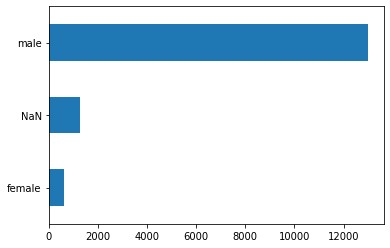

In [57]:
df.gender[df.LICTYPE.str.contains('Tow Truck')].value_counts(ascending = True).plot(kind = 'barh')

## 34. Calcuate the supposed gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [60]:
# So when you do .value_counts(), it gives you an index and a value
df[df['gender'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    95645
Journeyman Electrician    35508
A/C Technician            24713
Master Electrician        15769
Cosmetology Operator      13585
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [61]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['gender'] == 'male'].LICTYPE.value_counts(),
    df[df['gender'] == 'female'].LICTYPE.value_counts(),
    df[df['gender'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

,LICTYPE,LICTYPE,LICTYPE
Apprentice Electrician,95645.0,4790.0,NaN
Journeyman Electrician,35508.0,1025.0,NaN
A/C Technician,24713.0,877.0,NaN
Master Electrician,15769.0,393.0,NaN
Cosmetology Operator,13585.0,114807.0,NaN


In [62]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,Apprentice Electrician,95645.0,4790.0,NaN
1,Journeyman Electrician,35508.0,1025.0,NaN
2,A/C Technician,24713.0,877.0,NaN
3,Master Electrician,15769.0,393.0,NaN
4,Cosmetology Operator,13585.0,114807.0,NaN


In [ ]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

## 35. What 10 licenses with more than 2,000 people and over 75% "known" gender has the most male owners? The most female?

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## Okay, let's take a break for a second.

We've been diving pretty deep into this gender stuff after an initial "oh but it's not great" kind of thing.

**What issues might come up with our analysis?** Some might be about ethics or discrimination, while some might be about our analysis being misleading or wrong. Go back and take a critical look at what we've done since we started working on gender, and summarize your thoughts below.

If you found problems with our analysis, **how could we make improvements?**

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

## 39. Find each violation involving a failure with records. Use a regular expression.

## 40. How much money was each fine? Use a regular expression and .str.extract

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

## 42. Which orders results in the top fines?

## 43. Are you still here???

I'm sure impressed.